In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
seed = 1337
np.random.seed(seed)

def roll_damage(n_attacking_dice = 3, n_defending_dice = 3):

    successful_attacks = np.random.choice([0, 1], n_attacking_dice, p = [0.5, 0.5])
    successful_defenses = np.random.choice([0, 1], n_defending_dice, p = [2.0 / 3.0, 1.0 / 3.0])

    damage = max(successful_attacks.sum() - successful_defenses.sum(), 0)
    return damage

In [3]:
def get_samples(n_samples, n_attacking_dice, n_defending_dice):
    samples = [roll_damage(n_attacking_dice, n_defending_dice) for _ in range(n_samples)]
    return samples

In [4]:
def get_probability_from_samples(samples):
    values, counts = np.unique(samples, return_counts = True)
    total = counts.sum()
    probability = counts / total
    return values, probability

In [5]:
samples33 = get_samples(10000, 3, 3)
values33, probs33 = get_probability_from_samples(samples33)

In [6]:
samples34 = get_samples(10000, 3, 4)
values34, probs34 = get_probability_from_samples(samples34)

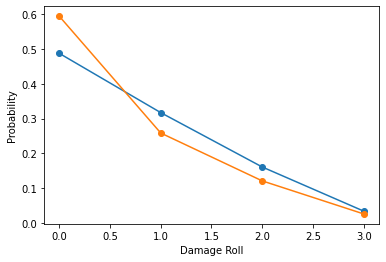

In [7]:
plt.plot(values33, probs33, marker = "o")
plt.plot(values34, probs34, marker = "o")
plt.xlabel("Damage Roll")
plt.ylabel("Probability")
# plt.title("")

plt.show()
plt.close()

In [8]:
class Character():
    def __init__(self, health = 10, n_attacking_dice = 3, n_defending_dice = 3):
        self.health_ = health
        self.n_attacking_dice_ = n_attacking_dice
        self.n_defending_dice_ = n_defending_dice
        
    def roll_damage(self):
        successful_attacks = np.random.choice([0, 1], self.n_attacking_dice_, p = [0.5, 0.5])
        return successful_attacks.sum()

    def roll_defense(self):
        successful_defenses = np.random.choice([0, 1], self.n_defending_dice_, p = [2.0 / 3.0, 1.0 / 3.0])
        return successful_defenses.sum()
    
    def apply_damage(self, dmg):
        self.health_ = self.health_ - dmg
        
    def apply_healing(self, healing):
        self.apply_damage(-healing)
        
    def is_dead(self):
        return self.health_ <= 0
    
    def is_alive(self):
        return (not self.is_dead())

In [131]:
def have_a_fight():
    
    # Build battlefield
    char_a = Character(health = 10, n_attacking_dice = 3, n_defending_dice = 3)
    char_b = Character(health = 10, n_attacking_dice = 3, n_defending_dice = 3)

    # Set up turn order
    init = np.random.randint(2)
    chars = [char_a, char_b]

    # Establish round loop and win conditions
    while char_a.is_alive() and char_b.is_alive():

        # Determine a / d.
        a = init
        d = (init + 1) % 2

        # Summarize a and d
        damage = chars[a].roll_damage()
        defense = chars[d].roll_defense()

        # Resolve hit.
        damage = np.max([damage - defense, 0])

        # Apply effects:
        chars[d].apply_damage(damage)

        # Update init.
        init = d

    # Determine winner.
    if char_a.is_alive():
        return 0
    elif char_b.is_alive():
        return 1
    else:
        print("OMFG WTF.")

In [132]:
fights = [have_a_fight() for _ in range(1000)]

852.0

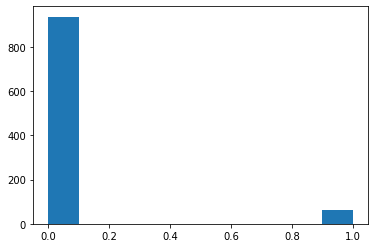

In [133]:
results = plt.hist(fights)
results[0][0] - results[0][-1] - 22

In [ ]:
#even = 22
#1 health = 162
#1 attack = 682
#1 defense = 448
#first initiative = 110